In [135]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb

In [136]:
# Read the dataset into a dataframe
df = pd.read_csv('D:/data/titanic.csv', sep='\t', engine='python')

In [137]:
# dummy = pd.get_dummies(df['Sex'])

In [138]:
# Rename a column A to a
# df.rename(columns={"A": "a"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


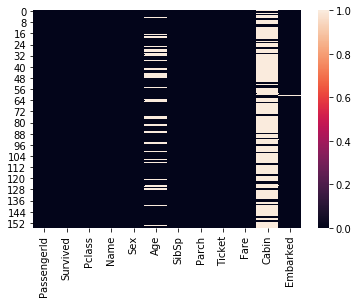

In [139]:
df.info()
sb.heatmap(df.isnull())

In [140]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Fare           156 non-null float64
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 11.0+ KB


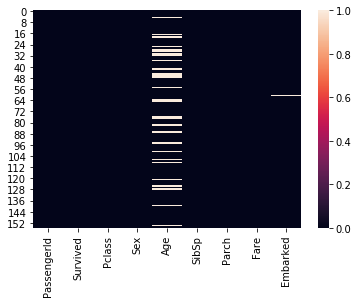

In [142]:
sb.heatmap(df.isnull())

In [143]:
# Drop all rows with missin data
df = df.dropna()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 155
Data columns (total 9 columns):
PassengerId    125 non-null int64
Survived       125 non-null int64
Pclass         125 non-null int64
Sex            125 non-null object
Age            125 non-null float64
SibSp          125 non-null int64
Parch          125 non-null int64
Fare           125 non-null float64
Embarked       125 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 9.8+ KB


In [145]:
# First, Convert the Pclass, Sex, Embarked columns which are categorical into indicator variables,
# the get_dummies() functions converts categorical variables into dummy indicator variables

# dummies = []
# cols = ['Pclass', 'Sex', 'Embarked']

# for col in cols:
#    dummy = pd.get_dummies(df[col])
#    dummies.append(dummy)
    
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

In [146]:
# Concatenate the three variables into a dataframe
# titanic_dummies = pd.concat(dummies, axis=1)

In [147]:
# Finally we concatenate to the original dataframe columnwise
# df = pd.concat((df,titanic_dummies),axis=1)
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)

In [148]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)

In [149]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    125 non-null int64
Survived       125 non-null int64
Pclass         125 non-null int64
Age            125 non-null float64
SibSp          125 non-null int64
Parch          125 non-null int64
Fare           125 non-null float64
C              125 non-null uint8
Q              125 non-null uint8
S              125 non-null uint8
female         125 non-null uint8
male           125 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 8.4 KB


In [151]:
# To replace missing values with interpolated values, for example Age
# df['Age'] = df['Age'].interpolate()

In [152]:
# Seperate the dataframe into X and y data
X = df.values
y = df['Survived'].values

# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [153]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [154]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7894736842105263

In [155]:
#Decision trees compute entropy in the information system. 
#If you peform a decision tree on dataset, 
#the variable importances_ contains important information on what columns of data has large variances 
#thus contributing to the decision. 
#Lets see the output

clf.feature_importances_

array([0.32481685, 0.03403168, 0.18342688, 0.02398014, 0.00375986,
       0.21250054, 0.00368688, 0.        , 0.01294107, 0.14388518,
       0.05697092])

In [156]:
# Lets push that accuracy score little bit more using Random Forests. 
# Random forests pretty work work for everything out of the box.
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7105263157894737

In [157]:
# Lets try Gradient boosting algorithm and we will see if we could up that score a bit.
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)


0.6842105263157895

In [160]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7105263157894737